# 1.4 Decision Trees

## Contents
### 1. Import libraries and Data
### 2. Create  Matrices
### 3. Run Decision Tree
### 4. Accuracy and Confusion Matrix

## 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [3]:
#Create a path to where your data is stored.
path = r'/Users/sydneyjohnson/Documents/CF Data Analytics Course/11-2024 ClimateWins Analysis/02 Data'


In [5]:
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [7]:
dfpls = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [9]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [11]:
#Reduce to just the mean temperatures
df = df[['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()

### 2. Create Matrices

In [13]:
# Create X matrix from df and y from dfpls
X = df
y = dfpls.drop(['DATE'], axis=1)

In [15]:
print(X)

       BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0                  6.5                 3.7                 2.4   
1                  6.1                 2.9                 2.3   
2                  8.5                 3.1                 2.7   
3                  6.3                 2.0                 2.0   
4                  3.0                 2.0                 2.5   
...                ...                 ...                 ...   
22945             15.9                18.2                11.7   
22946             16.7                15.9                11.7   
22947             16.7                13.4                11.7   
22948             15.4                15.0                11.7   
22949             13.5                14.4                11.7   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  HEATHROW_temp_mean  \
0                   9.3                  10.0                10.6   
1                   7.7                   8.2                 6.1   


In [17]:
print(y)

       BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
22945                       0                          0   
22946                       0                          0   
22947                       0                          0   
22948                       0                          0   
22949                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0   

In [19]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


## 3. Run Decision Tree

[Text(0.3779370409840937, 0.9848484848484849, 'x[8] <= 12.65\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.11418519837847707, 0.9545454545454546, 'x[9] <= 12.85\ngini = 0.1\nsamples = 10533\nvalue = [[9904, 629]\n[8963, 1570]\n[9386, 1147]\n[10387, 146]\n[10252, 281]\n[9925, 608]\n[10372, 161]\n[9675, 858]\n[10371, 162]\n[8015, 2518]\n[10179, 354]\n[10307, 226]\n[10533, 0]\n[10323, 210]\n[10376, 157]]'),
 Text(0.05053013441563279, 0.9242424242424242, 'x[2] <= 12.85\ngini = 0.036\nsamples = 7471\nvalue = [[7332, 139]\n[6811, 660]\n[7118, 353]\n[7426, 45]\n[7390, 81]\n[7407, 64]\n[7409, 62]\n[7243, 228]\n[7418, 53]\n[7252, 219]\n[7318, 153]\n[7435, 36]\n[7471, 0]\n[7438, 33]\n[7459, 12]]'),
 Text(0.028975759863203665, 0.8939393939393939, 'x[1] <= 12.05\ngini = 0.017

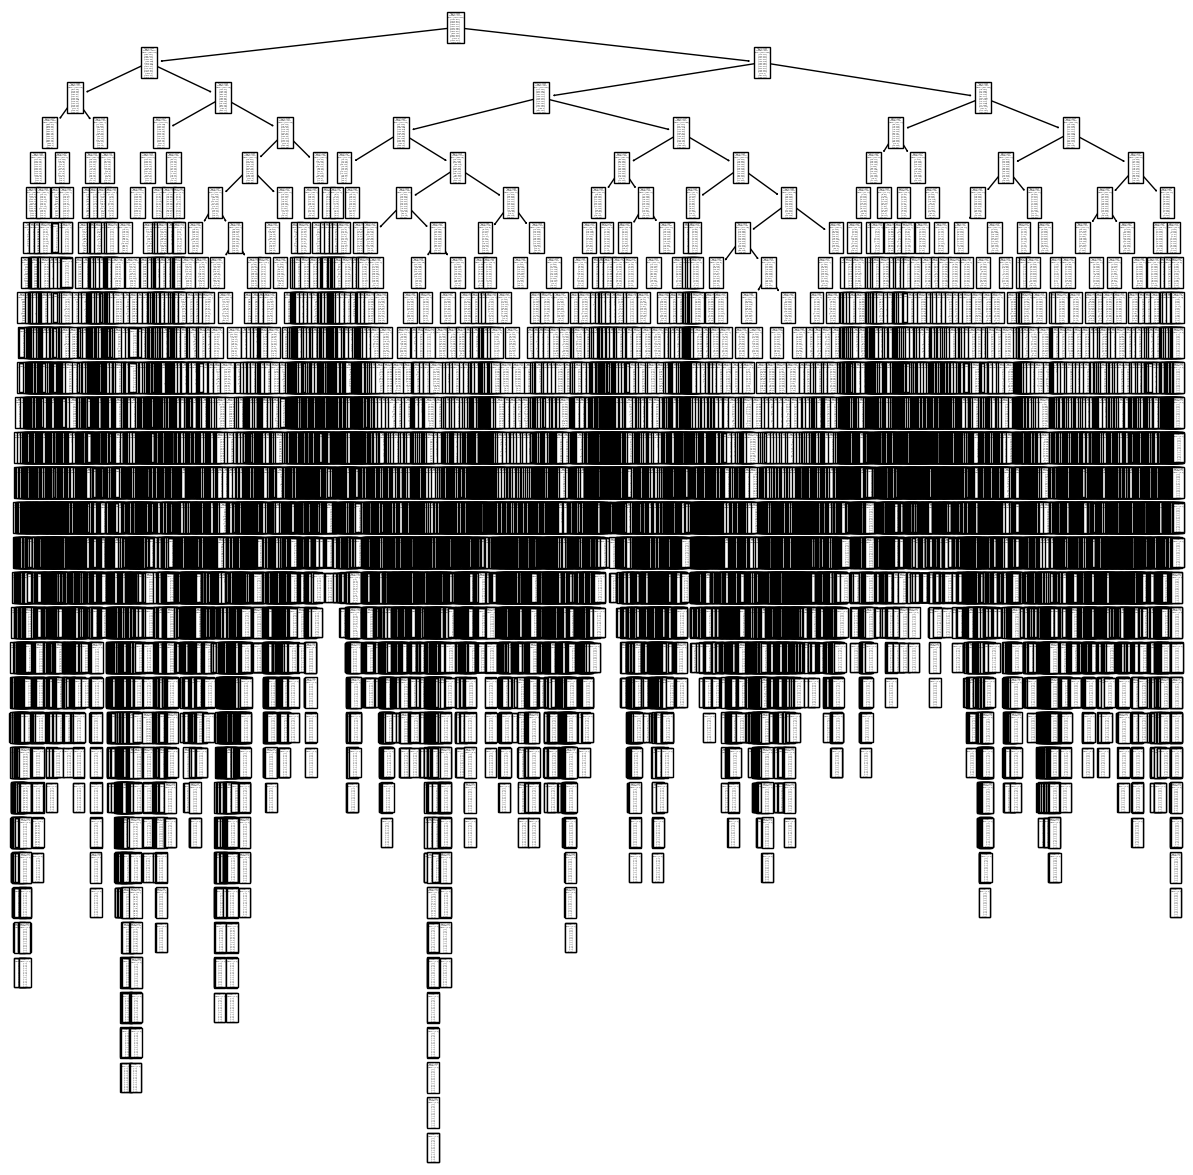

In [26]:
#Run Decision Tree classifier
climate_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
climate_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(climate_dt)

In [32]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = climate_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(climate_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.4003600747444847


## 4. Accuracy and Confusion Matrix

In [34]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [42]:
#What is the testing accuracy score? Using the cross validation method
y_pred = climate_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.4034506796793308


array([[[3739,  599],
        [ 551,  849]],

       [[3115,  661],
        [ 631, 1331]],

       [[3328,  572],
        [ 547, 1291]],

       [[4130,  507],
        [ 478,  623]],

       [[3953,  554],
        [ 537,  694]],

       [[3911,  659],
        [ 554,  614]],

       [[4376,  439],
        [ 420,  503]],

       [[3572,  623],
        [ 568,  975]],

       [[4029,  533],
        [ 498,  678]],

       [[2667,  501],
        [ 510, 2060]],

       [[4055,  491],
        [ 501,  691]],

       [[4464,  415],
        [ 388,  471]],

       [[5738,    0],
        [   0,    0]],

       [[4379,  387],
        [ 396,  576]],

       [[5244,  218],
        [ 202,   74]]])

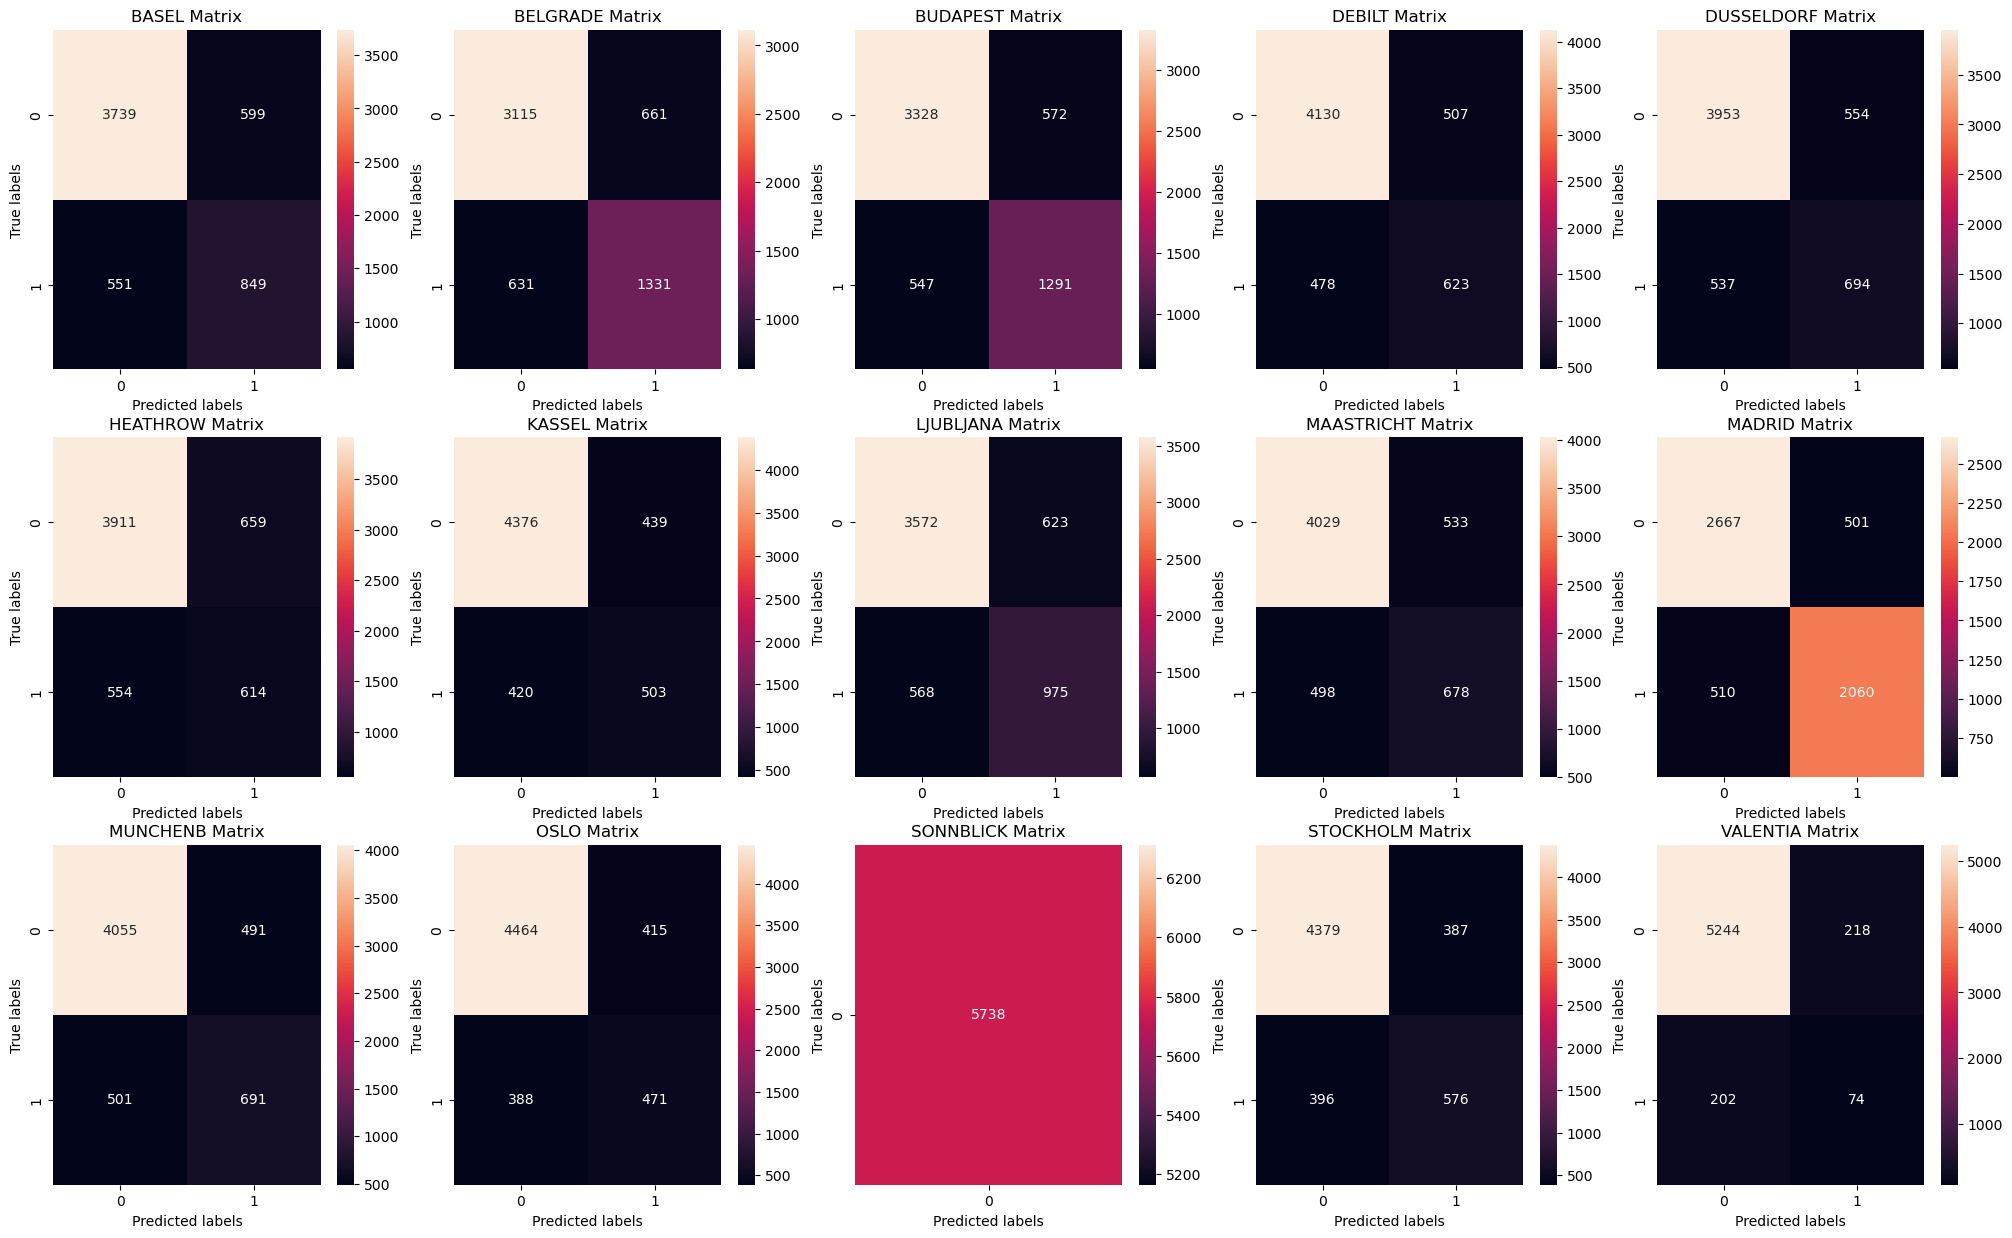

In [44]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [52]:
## Export Data
df.to_csv(os.path.join(path, 'unscaled_ML.csv'))